In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import datetime as dt
import statsmodels.api as sm
import seaborn as sns

In [2]:
#Jako zadanie zastanów się i postaraj się odpowiedzieć na następujące pytania:

 # 1   Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?
 #2   Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?
 #3   Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?
 #4   Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?
 #5   Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

# Przygotuj odpowiednie zestawienia i wizualizacje, a następnie sformułuj swoją opinię na temat wyżej wymienionych kwestii.
# Rozwiązanie prześlij Mentorowi do oceny.

In [3]:
df = pd.read_csv('HRDataset.csv')

In [4]:
df.head (5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [5]:
df.isnull()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
397,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
398,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
399,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


<AxesSubplot:>

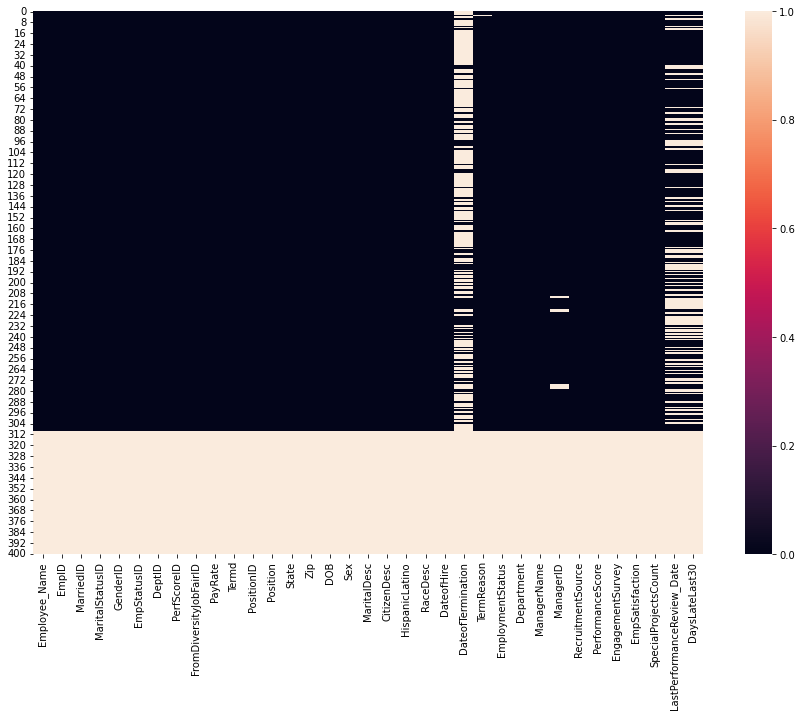

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [7]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

In [8]:
df.dropna(thresh=2,inplace=True)

In [9]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,N/A - still employed,Leave of Absence,IT/IS,Peter Monroe,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,N/A - still employed,Leave of Absence,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,N/A - Has not started yet,Future Start,IT/IS,Peter Monroe,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,N/A - still employed,Active,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0


In [10]:
# 1   Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID)
# danego pracownika, a oceną wydajności pracy (PerformanceScore)?
 

In [11]:
df2 = df [['ManagerID', 'ManagerName', 'PerformanceScore']]

In [12]:
df2

,ManagerID,ManagerName,PerformanceScore
0,1.0,Brandon R. LeBlanc,Fully Meets
1,1.0,Brandon R. LeBlanc,Fully Meets
2,1.0,Brandon R. LeBlanc,Fully Meets
3,1.0,Brandon R. LeBlanc,Fully Meets
4,1.0,Brandon R. LeBlanc,Fully Meets
...,...,...,...
305,7.0,Peter Monroe,Fully Meets
306,7.0,Peter Monroe,Fully Meets
307,7.0,Peter Monroe,Fully Meets
308,7.0,Peter Monroe,Fully Meets


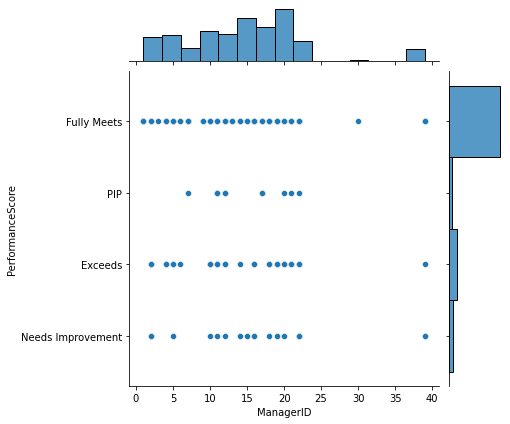

In [13]:
sns.jointplot(x='ManagerID',y='PerformanceScore',data=df2)

In [14]:
simple_reg = df[['ManagerName','PerformanceScore']]

In [15]:
simple_reg

,ManagerName,PerformanceScore
0,Brandon R. LeBlanc,Fully Meets
1,Brandon R. LeBlanc,Fully Meets
2,Brandon R. LeBlanc,Fully Meets
3,Brandon R. LeBlanc,Fully Meets
4,Brandon R. LeBlanc,Fully Meets
...,...,...
305,Peter Monroe,Fully Meets
306,Peter Monroe,Fully Meets
307,Peter Monroe,Fully Meets
308,Peter Monroe,Fully Meets


In [16]:
simple_reg.describe()

,ManagerName,PerformanceScore
count,310,310
unique,21,4
top,Kelley Spirea,Fully Meets
freq,22,243


Text(0, 0.5, 'PerformanceScore')

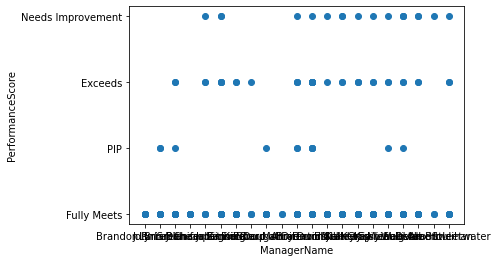

In [17]:
import matplotlib.pyplot as plt
plt.scatter(simple_reg['ManagerName'],simple_reg['PerformanceScore'])
plt.xlabel('ManagerName')
plt.ylabel('PerformanceScore')

In [18]:
df21 = pd.crosstab(df2['ManagerName'],df2['PerformanceScore'])

In [19]:

df21['sum'] = df21.sum(axis=1)

In [20]:
df21

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP,sum
ManagerName,,,,,
Alex Sweetwater,2,6,1,0,9
Amy Dunn,3,15,1,2,21
Board of Directors,0,2,0,0,2
Brandon R. LeBlanc,0,7,0,0,7
Brannon Miller,7,9,1,4,21
Brian Champaigne,0,8,0,0,8
David Stanley,1,19,1,0,21
Debra Houlihan,0,2,1,0,3
Elijiah Gray,2,18,2,0,22


In [21]:
df33= df21.sort_values(by='sum',ascending=False)

In [22]:
df33

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP,sum
ManagerName,,,,,
Michael Albert,2,16,3,1,22
Kissy Sullivan,2,18,1,1,22
Kelley Spirea,3,18,1,0,22
Elijiah Gray,2,18,2,0,22
Webster Butler,2,17,2,0,21
Amy Dunn,3,15,1,2,21
Brannon Miller,7,9,1,4,21
Ketsia Liebig,2,18,1,0,21
David Stanley,1,19,1,0,21


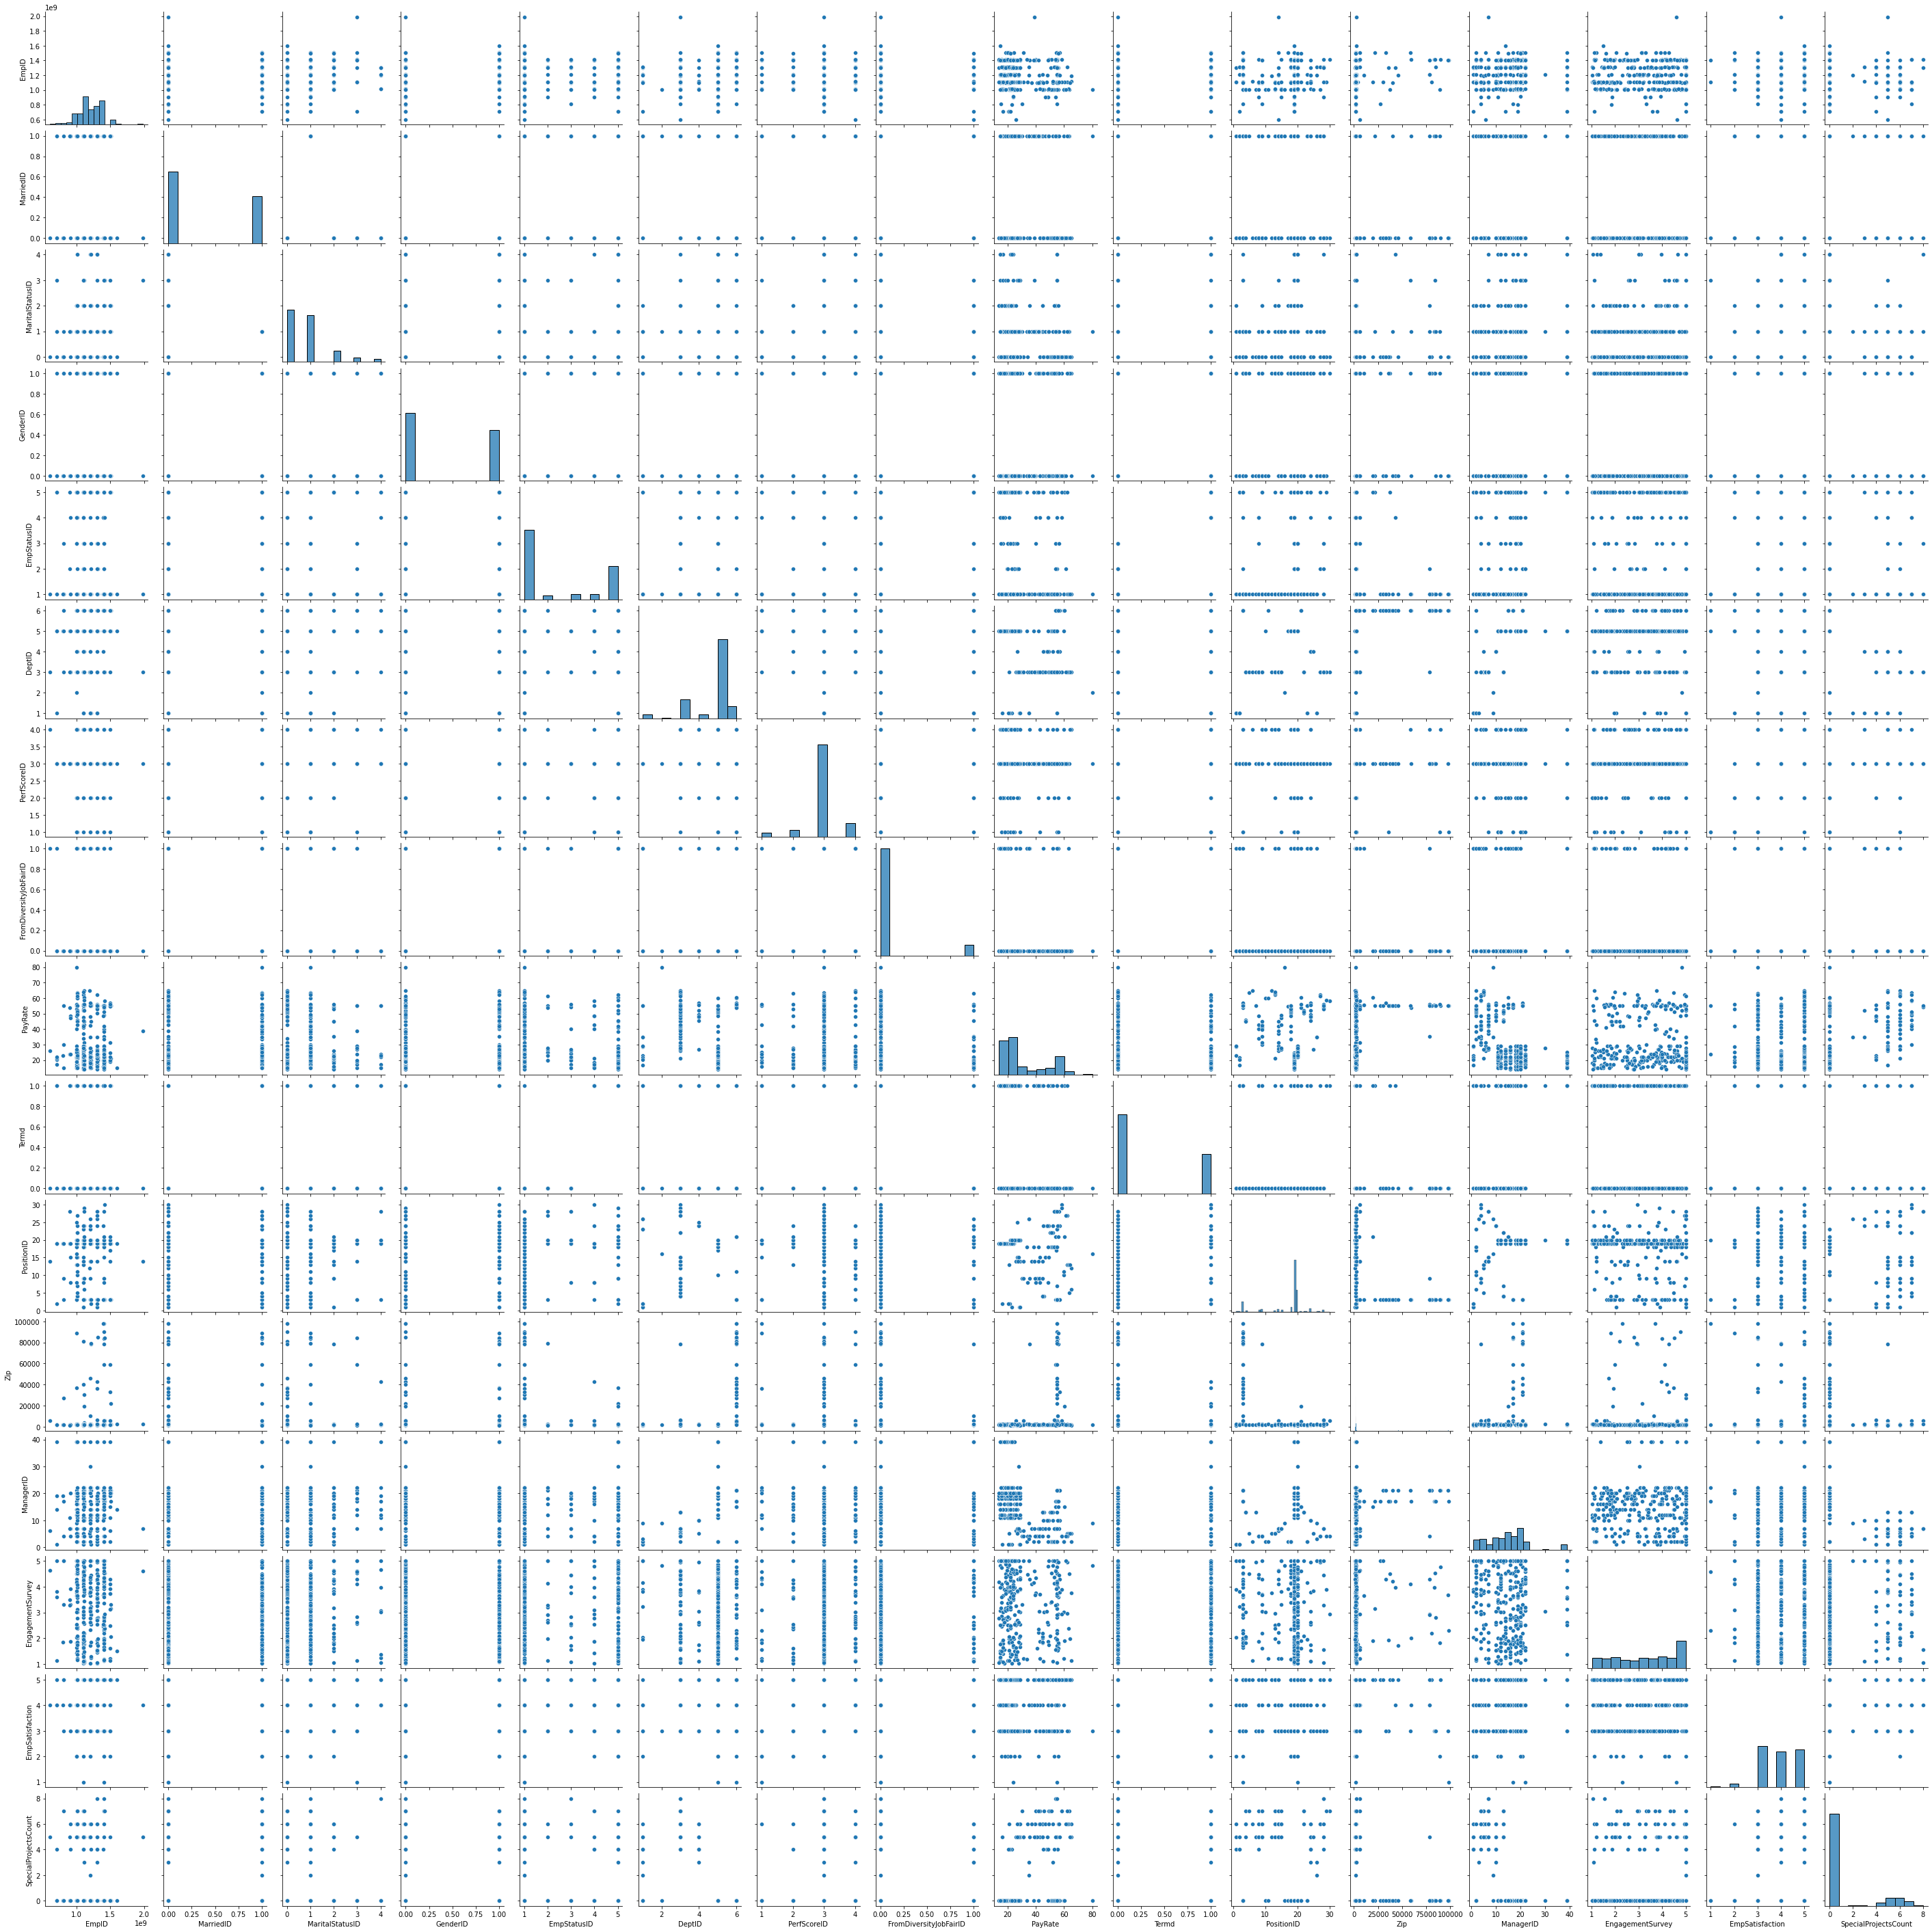

In [23]:
sns.pairplot(df[df.columns[~df.columns.str.endswith('PerformanceScore')]].select_dtypes(float))


In [24]:
#2   Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym
# stażu pracowników?

In [25]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    object
DOB                  object
DateofHire           object
dtype: object

In [26]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaN,11/24/87,10/27/2008
1,NaN,04/26/84,1/6/2014
2,NaN,09/01/86,9/29/2014
3,04/15/15,09/16/85,2/16/2015
4,NaN,05/19/88,5/1/2015


In [27]:
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [28]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaN,11/24/87,2008-10-27
1,NaN,04/26/84,2014-01-06
2,NaN,09/01/86,2014-09-29
3,04/15/15,09/16/85,2015-02-16
4,NaN,05/19/88,2015-05-01


In [29]:

df['DOB'] = df['DOB'].apply(lambda x: x.replace("/", "-"))    
  

In [30]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaN,11-24-87,2008-10-27
1,NaN,04-26-84,2014-01-06
2,NaN,09-01-86,2014-09-29
3,04/15/15,09-16-85,2015-02-16
4,NaN,05-19-88,2015-05-01


In [31]:
#3   Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

In [32]:
df[['EmpSatisfaction','MaritalStatusID']]

,EmpSatisfaction,MaritalStatusID
0,2.0,1.0
1,4.0,2.0
2,5.0,0.0
3,3.0,1.0
4,3.0,0.0
...,...,...
305,5.0,1.0
306,5.0,1.0
307,4.0,1.0
308,3.0,0.0


In [33]:
df7 = pd.crosstab(df['EmpSatisfaction'],df['MaritalStatusID'])

In [34]:
df['MaritalDesc']

0       Married
1      Divorced
2        Single
3       Married
4        Single
         ...   
305     Married
306     Married
307     Married
308      Single
309     Widowed
Name: MaritalDesc, Length: 310, dtype: object

In [35]:
df7

MaritalStatusID,0.0,1.0,2.0,3.0,4.0
EmpSatisfaction,,,,,
1.0,1,0,0,1,0
2.0,3,5,1,0,0
3.0,44,54,6,4,0
4.0,40,31,14,2,6
5.0,49,33,9,5,2


In [36]:
 #4   Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [37]:
df['DOB']

0      11-24-87
1      04-26-84
2      09-01-86
3      09-16-85
4      05-19-88
         ...   
305    01-18-52
306    04-23-86
307    02-09-83
308    09-09-65
309    05-02-78
Name: DOB, Length: 310, dtype: object

In [38]:
 #5   Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

In [39]:
SpecialProjectCount

NameError: name 'SpecialProjectCount' is not defined

In [ ]:
sns.distplot(df['DOB'])